In [233]:
import numpy as np
from CartPole import *
import random
from sklearn.linear_model import LinearRegression

In [234]:
"""introduce noise in the observed dynamics"""
def lin_reg(X,Y):
    X = np.matrix(X)
    XT = np.matrix.transpose(X)
    Y = np.matrix(Y)
    XT_X = np.matmul(XT, X)
    XT_Y = np.matmul(XT, Y)
    betas = np.matmul(np.linalg.inv(XT_X), XT_Y)
    return betas

def mse(y1,y2):
    se = 0
    for i,j in zip(y1,y2):
#         se += abs((i-j)/i)
        se += np.square(i-j)
    return se/y1.shape[0]


def gen_train(N):
    # generate the dataset
    cartpole1 = CartPole()
    X = [] # true value for current state
    X_wn = [] # observed current state
    Y = [] # true change in state
    Y_wn = [] # observed change in state
    for i in range(N):
        x = random.uniform(-5,5)
        x_dot = random.uniform(-10,10)
        theta = random.uniform(-np.pi,np.pi)
        theta_dot = random.uniform(-15,15)
        Xn = np.array([x,x_dot,theta,theta_dot])
        X.append(Xn)
        cartpole1.setState(Xn)
        n1 = np.random.normal(0,0.1,1)[0]
        n2 = np.random.normal(0,0.1,1)[0]
        n3 = np.random.normal(0,0.05,1)[0]
        n4 = np.random.normal(0,0.1,1)[0]
        noise = np.array([n1,n2,n3,n4])
        Xn += noise
        Xn[2] = remap_angle(Xn[2])
        X_wn.append(Xn)
        cartpole1.performAction()
        Xn_1 = np.array(cartpole1.getState())
        Y.append(Xn_1-Xn)
        n1 = np.random.normal(0,0.1,1)[0]
        n2 = np.random.normal(0,0.1,1)[0]
        n3 = np.random.normal(0,0.05,1)[0]
        n4 = np.random.normal(0,0.1,1)[0]
        noise = np.array([n1,n2,n3,n4])
        Yn = Xn_1+noise-Xn
        Yn[2] = remap_angle(Yn[2])
        Y_wn.append(Yn)
    X = np.array(X)
    X_wn = np.array(X_wn)
    Y = np.array(Y)
    Y_wn = np.array(Y_wn)
    coef = lin_reg(X,Y)
    coef_wn = lin_reg(X_wn,Y_wn)
    Y_predict = np.matmul(X,coef)
    Y_predict = np.array(Y_predict)
    Y_predict_wn = np.matmul(X,coef_wn)
    Y_predict_wn = np.array(Y_predict_wn)
    return mse(Y_predict,Y), mse(Y_predict_wn,Y)


In [235]:
# """generating random states X and corresponding Y with noise"""
# cartpole1 = CartPole()
# X = [] # true value for current state
# X_wn = [] # observed current state
# Y = [] # true change in state
# Y_wn = [] # observed change in state
# N = 1000 # no of datapoints
# for i in range(N):
#     x = np.random.uniform([-5,5,1])[0]
#     x_dot = np.random.uniform([-10,10,1])[0]
#     theta = np.random.uniform([-np.pi,np.pi,1])[0]
#     theta_dot = np.random.uniform([-15,15,1])[0]
#     Xn = np.array([x,x_dot,theta,theta_dot])
#     X.append(Xn)
#     cartpole1.setState(Xn)
#     # generate Gaussian noise in system dynamics
#     noise = np.random.normal(0,.1,Xn.shape)
#     X_wn.append(Xn+noise)
#     cartpole1.performAction()
#     cartpole1.remap_angle()
#     Xn_1 = np.array(cartpole1.getState())
#     Y.append(Xn_1-Xn)
#     # generate Guassian noise in observed data
#     noise = np.random.normal(0,1.,Xn_1.shape)
#     Y_wn.append(Xn_1+noise-Xn)
# X = np.array(X)
# X_wn = np.array(X_wn)
# Y = np.array(Y)
# Y_wn = np.array(Y_wn)

In [236]:
N = 500
m = [] # collection of mse without noise
m_wn = [] # collection of mse with noise
list_N = []
for i in range(5):
    list_N.append(N)
    a, b = gen_train(N)
    m.append(a)
    m_wn.append(b)
    N *= 5
m = np.array(m)
m_wn = np.array(m_wn)

# """plotting"""
# plt.plot(list_N,m,label='without noise')
# plt.plot(list_N,m_wn,label='with observation noise')
# plt.xscale('log')
# plt.legend()

KeyboardInterrupt: 

In [ ]:
"""plotting"""

"""plotting"""
fig, axs = plt.subplots(2,2,figsize=(9,16),constrained_layout=True)
axs[0,0].plot(list_N,m[:,0],label='without noise')
axs[0,0].plot(list_N,m_wn[:,0],label='with observation noise')
axs[0,0].set_title('change in cart_location')
axs[0,0].set_xlabel('N')
axs[0,0].set_ylabel('mean percentage error')
axs[0,0].set_xscale('log')
axs[0,1].plot(list_N,m[:,1],label='without noise')
axs[0,1].plot(list_N,m_wn[:,1],label='with observation noise')
axs[0,1].set_title('change in cart_velocity')
axs[0,1].set_xlabel('N')
axs[0,1].set_ylabel('mean percentage error')
axs[0,1].set_xscale('log')
axs[1,0].plot(list_N,m[:,2],label='without noise')
axs[1,0].plot(list_N,m_wn[:,2],label='with observation noise')
axs[1,0].set_title('change in pole_angle')
axs[1,0].set_xlabel('N')
axs[1,0].set_ylabel('mean percentage error')
axs[1,0].set_xscale('log')
axs[1,1].plot(list_N,m[:,3],label='without noise')
axs[1,1].plot(list_N,m_wn[:,3],label='with observation noise')
axs[1,1].set_title('change in pole_velocity')
axs[1,1].set_xlabel('N')
axs[1,1].set_ylabel('mean percentage error')
axs[1,1].set_xscale('log')
fig.suptitle('prediction with/without observation noise', fontsize=16)
handles, labels = axs[1,1].get_legend_handles_labels()
fig.legend(handles, labels)
# fig.tight_layout()
plt.show()

In [237]:
"""generating random states X and corresponding Y with noise"""
cartpole1 = CartPole()
X = [] # true value for current state
X_wn = [] # observed current state
Y = [] # true change in state
Y_wn = [] # observed change in state
N = 500 # no of datapoints
for i in range(N):
    x = np.random.uniform([-5,5,1])[0]
    x_dot = np.random.uniform([-10,10,1])[0]
    theta = np.random.uniform([-np.pi,np.pi,1])[0]
    theta_dot = np.random.uniform([-15,15,1])[0]
    Xn = np.array([x,x_dot,theta,theta_dot])
    X.append(Xn)
    cartpole1.setState(Xn)
#     generate Gaussian noise in system dynamics
#     n1 = np.random.normal(0,0.1,1)[0]
#     n2 = np.random.normal(0,0.1,1)[0]
#     n3 = np.random.normal(0,0.05,1)[0]
#     n4 = np.random.normal(0,0.1,1)[0]
    n1 = np.random.normal(0,1,1)[0]
    n2 = np.random.normal(0,1,1)[0]
    n3 = np.random.normal(0,0.5,1)[0]
    n4 = np.random.normal(0,1,1)[0]
    noise = np.array([n1,n2,n3,n4])
    Xnn = Xn+noise
    Xnn[2] = remap_angle(Xnn[2])
    X_wn.append(Xnn)
    cartpole1.performAction()
    cartpole1.remap_angle()
    Xn_1 = np.array(cartpole1.getState())
    Y.append(Xn_1-Xn)
    # generate Guassian noise in observed data
#     n1 = np.random.normal(0,0.1,1)[0]
#     n2 = np.random.normal(0,0.1,1)[0]
#     n3 = np.random.normal(0,0.05,1)[0]
#     n4 = np.random.normal(0,0.1,1)[0]
    n1 = np.random.normal(0,1,1)[0]
    n2 = np.random.normal(0,1,1)[0]
    n3 = np.random.normal(0,0.5,1)[0]
    n4 = np.random.normal(0,1,1)[0]
    noise = np.array([n1,n2,n3,n4])
    Yn = Xn_1+noise-Xn
    Yn[2] = remap_angle(Yn[2])
    Y_wn.append(Yn)

X = np.array(X)
X_wn = np.array(X_wn)
Y = np.array(Y)
Y_wn = np.array(Y_wn)
coef = lin_reg(X,Y)
coef_wn = lin_reg(X_wn,Y_wn)
print(coef)
print(coef_wn)
Y_predict = np.matmul(X,coef)
Y_predict = np.array(Y_predict)
Y_predict_wn = np.matmul(X,coef_wn)
Y_predict_wn = np.array(Y_predict_wn)

[[ 0.00202431  0.0623808   0.10418715  0.21964306]
 [ 0.20128264  0.04009441  0.0824541   0.20750779]
 [-0.01280104 -0.4145682  -1.6168703  -0.00942601]
 [ 0.01363436  0.11176956 -0.03099513  0.00470751]]
[[ 0.02611255  0.00550521  0.01983861  0.19061986]
 [ 0.18566002  0.0267612   0.04167375  0.17819857]
 [-0.009744   -0.28753971  0.15727584  0.27809853]
 [ 0.00791413  0.11064035  0.08047265  0.00233384]]


In [238]:
"""try generate the dataset and add noise together"""
cartpole1 = CartPole()
X = [] # true value for current state
XX = [] # true value for next state
X_wn = [] # observed current state
Y = [] # true change in state
Y_wn = [] # observed change in state
N = 1000 # no of datapoints
for i in range(N):
    x = np.random.uniform([-5,5,1])[0]
    x_dot = np.random.uniform([-10,10,1])[0]
    theta = np.random.uniform([-np.pi,np.pi,1])[0]
    theta_dot = np.random.uniform([-15,15,1])[0]
    Xn = np.array([x,x_dot,theta,theta_dot])
    X.append(Xn)
    cartpole1.setState(Xn)
    cartpole1.performAction()
    cartpole1.remap_angle()
    Xn_1 = np.array(cartpole1.getState())
    XX.append(Xn_1)
    Y.append(Xn_1-Xn)

X = np.array(X)
Xnoise = np.random.normal(0,0.1,size=(N,4))
X_wn = X + Xnoise
XXnoise = np.random.normal(0,0.1,size=(N,4))
XX_wn = XX + XXnoise
Y = np.array(Y)
Y_wn = np.array(XX_wn-X_wn)
# coef = lin_reg(X,Y)
# coef_wn = lin_reg(X_wn,Y_wn)
reg1 = LinearRegression().fit(X,Y)
reg2 = LinearRegression().fit(X_wn,Y_wn)
inter1 = reg1.intercept_
inter2 = reg2.intercept_
coef = reg1.coef_
coef_wn = reg2.coef_
print(coef)
print(coef_wn)
Y_predict = np.matmul(X,coef)
Y_predict = np.array(Y_predict)
Y_predict_wn = np.matmul(X,coef_wn)
Y_predict_wn = np.array(Y_predict_wn)

[[ 4.31025734e-05  1.97428912e-01 -1.45033689e-02  1.03429983e-02]
 [-6.28471674e-03 -2.19500005e-02 -4.75096301e-01  4.14068272e-02]
 [ 3.58781318e-04  9.84990011e-03 -1.85271558e+00 -1.08931321e-01]
 [-3.63195253e-03 -2.78159133e-02 -7.01953678e-01 -2.60156579e-01]]
[[-1.22379845e-03  1.97085692e-01 -1.21992584e-02  9.87970108e-03]
 [-4.27046519e-03 -2.18915275e-02 -4.73878739e-01  3.91725991e-02]
 [-2.46730982e-03  1.12037044e-02 -1.85009109e+00 -1.08703082e-01]
 [-6.28551653e-03 -2.70538431e-02 -6.95255545e-01 -2.61142512e-01]]


In [239]:
print(mse(Y,Y_predict))
print(mse(Y,Y_predict_wn))

[ 1.51392781  1.94670461 76.0582156  24.00460936]
[ 1.53828462  1.93962032 74.93464505 24.12402858]


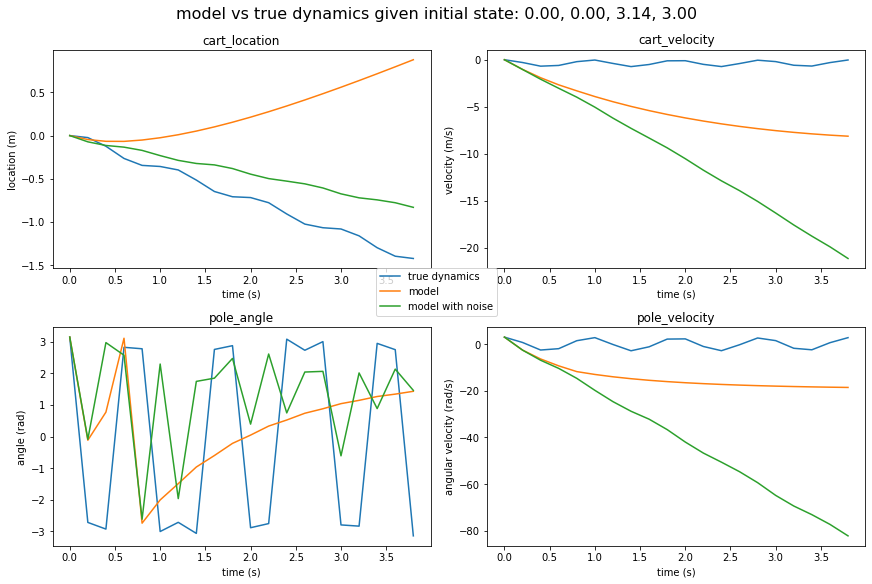

In [240]:
"""rollout of linear model"""
max_t = 4
Xn = np.array([0,0,np.pi,3])
steps = int(max_t/cartpole1.delta_time)
X_cartpole = [Xn]
X_model = [Xn]
X_model1 = [Xn]

Xn1_new = Xn
Xn2_new = Xn
Xn3_new = Xn

for i in range(steps):
    Xn1 = Xn1_new
    Xn2 = Xn2_new
    Xn3 = Xn3_new
    # Yn1 = model.predict([Xn1])[0]
    Yn1 = np.matmul(Xn1,coef)+inter1
    Yn1 = np.array(Yn1)
    Xn1_new = Xn1 + Yn1
    # remapping the angle
    # print(Xn1_new)
    Xn1_new = Xn1_new.flatten()
    Yn3 = np.matmul(Xn2,coef_wn)+inter2
    Yn3 = np.array(Yn3)
    Xn3_new = Xn3 + Yn3
    Xn3_new = Xn3_new.flatten()
    # print(Xn1_new)
    Xn1_new[2] = remap_angle(Xn1_new[2])
    Xn3_new[2] = remap_angle(Xn3_new[2])
    X_model.append(Xn1_new)
    X_model1.append(Xn3_new)
    cartpole1.setState(Xn2)
    cartpole1.performAction()
    # # remapping the angle for performAction
    cartpole1.remap_angle()
    Xn2_new = np.array(cartpole1.getState())
    X_cartpole.append(Xn2_new)

X_cartpole = np.array(X_cartpole[:-1])
X_model = np.array(X_model[:-1])
X_model1 = np.array(X_model1[:-1])

"""plotting"""
t = np.arange(0,max_t,cartpole1.delta_time)
fig, axs = plt.subplots(2,2,figsize=(12,8),constrained_layout=True)
axs[0,0].plot(t,X_cartpole[:,0],label='true dynamic')
axs[0,0].plot(t,X_model[:,0],label='model')
axs[0,0].plot(t,X_model1[:,0],label='model with noise')
axs[0,0].set_title('cart_location')
axs[0,0].set_xlabel('time (s)')
axs[0,0].set_ylabel('location (m)')
axs[0,0].set_xlim([0,5])
axs[0,0].autoscale()
# axs[0,0].set_ylim([-20,20])

axs[0,1].plot(t,X_cartpole[:,1],label='true dynamics')
axs[0,1].plot(t,X_model[:,1],label='model')
axs[0,1].plot(t,X_model1[:,1],label='model with noise')
axs[0,1].set_title('cart_velocity')
axs[0,1].set_xlabel('time (s)')
axs[0,1].set_ylabel('velocity (m/s)')
axs[0,1].set_xlim([0,5])
axs[0,1].autoscale()
# axs[0,1].set_ylim([-20,20])

axs[1,0].plot(t,X_cartpole[:,2],label='true dynamics')
axs[1,0].plot(t,X_model[:,2],label='model')
axs[1,0].plot(t,X_model1[:,2],label='model with noise')
axs[1,0].set_title('pole_angle')
axs[1,0].set_xlabel('time (s)')
axs[1,0].set_ylabel('angle (rad)')
axs[1,0].set_xlim([0,5])
axs[1,0].autoscale()
# axs[1,0].set_ylim([-20,20])

axs[1,1].plot(t,X_cartpole[:,3],label='true dynamics')
axs[1,1].plot(t,X_model[:,3],label='model')
axs[1,1].plot(t,X_model1[:,3],label='model with noise')
axs[1,1].set_title('pole_velocity')
axs[1,1].set_xlabel('time (s)')
axs[1,1].set_ylabel('angular velocity (rad/s)')
axs[1,1].set_xlim([0,5])
axs[1,1].autoscale()
# axs[1,1].set_ylim([-20,20])


handles, labels = axs[1,1].get_legend_handles_labels()
fig.legend(handles, labels, loc='center')
fig.suptitle('model vs true dynamics given initial state: {0:.2f}, {1:.2f}, {2:.2f}, {3:.2f}'.format(
                                                                    Xn[0],Xn[1],Xn[2],Xn[3]), fontsize=16)


plt.show()

In [241]:
"""now for nonlinear model"""
import random

def kernel(X,Xi,sigma):
    K = np.zeros((X.shape[0],Xi.shape[0]))
    dim = X.shape[1]
    for i,x in enumerate(X):
        for j,xi in enumerate(Xi):
            sum = 0
            for k in range(dim):
                if k == 2:
                    sum += 1.0*np.sin((x[k]-xi[k])/2)**2/sigma[k]**2
                else:
                    sum += 1.0*(x[k]-xi[k])**2/sigma[k]**2
            K[i,j] = np.exp(-0.5*sum)
    return K

def fit(K_NM,K_MM,lam,Y):
    """return coefficients for each of the dimensions"""
    K_MN = np.transpose(K_NM)
    A = np.matmul(K_MN,K_NM) + lam * K_MM
    B = np.matmul(K_MN,Y)
    alpha = np.linalg.lstsq(A,B)[0]
    return alpha

def predict(X,XM,sigma,alpha):
    K_MN = kernel(X,XM,sigma)
    return np.matmul(K_MN,alpha)

def l(X,sigma):
    """X: state vector"""
    sum = 0
    for i,x in enumerate(X):
        sum += -0.5*np.linalg.norm(x)**2/sigma[i]**2
    return 1.0-np.exp(sum)

In [242]:
"""again generating the dataset"""
N = 1000 # NO of datapoints
M = 800 # NO of data locations for basis function
lam = 10**(-4) # variance of data noise

X = []
X_wn = []
Y = []
Y_wn = []
for i in range(N):
    x = random.uniform(-5,5)
    x_dot = random.uniform(-10,10)
    theta = random.uniform(-np.pi,np.pi)
    theta_dot = random.uniform(-15,15)
    act = random.uniform(-20,20)
    # noise in the true dynamics
    # add code here
    Xn = np.array([x,x_dot,theta,theta_dot,act])
    X.append(Xn)
    cartpole1.setState(Xn[:-1])
    cartpole1.performAction(action=Xn[-1])
    n1 = np.random.normal(0,0.1,1)[0]
    n2 = np.random.normal(0,0.1,1)[0]
    n3 = np.random.normal(0,0.05,1)[0]
    n4 = np.random.normal(0,0.1,1)[0]
    n5 = np.random.normal(0,0.1,1)[0]
    noise = np.array([n1,n2,n3,n4,n5])
    Xnn = Xn + noise
    X_wn.append(Xnn)
    Xn_1 = np.array(cartpole1.getState())
    Y.append(Xn_1-Xn[:-1])
    # noise in the observed dynamics
    n1 = np.random.normal(0,0.1,1)[0]
    n2 = np.random.normal(0,0.1,1)[0]
    n3 = np.random.normal(0,0.05,1)[0]
    n4 = np.random.normal(0,0.1,1)[0]
    noise = np.array([n1,n2,n3,n4])
    Xn_1 += noise
    Y_wn.append(Xn_1-Xnn[:-1])
X = np.array(X)
X_wn = np.array(X_wn)
Y = np.array(Y)
Y_wn = np.array(Y_wn)

M_ind = random.sample(range(N),M)
XM = np.array([X[ind] for ind in M_ind])
XMn = np.array([X_wn[ind] for ind in M_ind])
sigma = [np.std(X[:,i]) for i in range(X.shape[1])]
sigman = [np.std(X[:,i]) for i in range(X.shape[1])]
K_NM = kernel(X,XM,sigma)
K_MM = kernel(XM,XM,sigma)
K_NMn = kernel(X_wn,XMn,sigman)
K_MMn = kernel(XMn,XMn,sigman)

In [ ]:
"""again generating the dataset"""
N = 1000 # NO of datapoints
M = 800 # NO of data locations for basis function
lam = 10**(-4) # variance of data noise

X = []
XX = []
X_wn = []
Y = []
Y_wn = []
for i in range(N):
    x = random.uniform(-5,5)
    x_dot = random.uniform(-10,10)
    theta = random.uniform(-np.pi,np.pi)
    theta_dot = random.uniform(-15,15)
    act = random.uniform(-20,20)
    Xn = np.array([x,x_dot,theta,theta_dot,act])
    X.append(Xn)
    cartpole1.setState(Xn[:-1])
    cartpole1.performAction(action=Xn[-1])
    Xn_1 = np.array(cartpole1.getState())
    XX.append(Xn_1)
    Y.append(Xn_1-Xn[:-1])

X = np.array(X)
Xnoise = np.random.normal(0,0.1,size=(N,5))
X_wn = X + Xnoise
XXnoise = np.random.normal(0,0.1,size=(N,4))
XX_wn = XX + XXnoise
Y = np.array(Y)
Y_wn = np.array(XX_wn-X_wn[:,:-1])

M_ind = random.sample(range(N),M)
XM = np.array([X[ind] for ind in M_ind])
XMn = np.array([X_wn[ind] for ind in M_ind])
sigma = [np.std(X[:,i]) for i in range(X.shape[1])]
sigman = [np.std(X[:,i]) for i in range(X.shape[1])]
K_NM = kernel(X,XM,sigma)
K_MM = kernel(XM,XM,sigma)
K_NMn = kernel(X_wn,XMn,sigman)
K_MMn = kernel(XMn,XMn,sigman)

In [243]:
alpha = fit(K_NM,K_MM,lam,Y)
alphan = fit(K_NMn,K_MMn,lam,Y_wn)
Y_predict = predict(X,XM,sigma,alpha)
Y_predict_wn = predict(X,XMn,sigman,alphan)

<ipython-input-241-e6f1cdb2c830>:23: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  alpha = np.linalg.lstsq(A,B)[0]


In [ ]:
print(alpha.shape)

In [ ]:
"""plotting the rollout"""
# setting parameters
max_t = 4.0
steps = int(max_t/cartpole1.delta_time) # 0.2s per step

Xn = np.array([0,0,np.pi,3.0])
# z = np.zeros((M,1))
# np.append(XM,z,axis=1)
# np.append(XMn,z,axis=1)

X_cartpole = [Xn]
X_model = [Xn] 
X_model1 = [Xn] 

Xn1_new = Xn
Xn2_new = Xn
Xn3_new = Xn

for i in range(steps):
    Xn1 = Xn1_new
    Xn2 = Xn2_new
    Xn3 = Xn3_new
    Xn1 = Xn1.reshape(1,Xn1.shape[0])
    Yn1 = predict(Xn1,XM,sigma,alpha)
    Xn1_new = Xn1 + Yn1
    Xn1_new = np.array(Xn1_new[0])
    Xn1_new[2] = remap_angle(Xn1_new[2])
    X_model.append(Xn1_new)
    
    Xn3 = Xn3.reshape(1,Xn3.shape[0])
    Yn3 = predict(Xn3,XMn,sigman,alphan)
    Xn3_new = Xn3 + Yn3
    Xn3_new = np.array(Xn3_new[0])
    Xn3_new[2] = remap_angle(Xn3_new[2])
    X_model1.append(Xn3_new)
    
    cartpole1.setState(Xn2)
    cartpole1.performAction()
    cartpole1.remap_angle()
    Xn2_new = np.array(cartpole1.getState())
    X_cartpole.append(Xn2_new)

X_cartpole = np.array(X_cartpole[:-1])
X_model = np.array(X_model[:-1])
X_model1 = np.array(X_model1[:-1])


print('start plotting')
"""plotting"""
t = np.arange(0,max_t,cartpole1.delta_time)
fig, axs = plt.subplots(2,2,figsize=(12,8),constrained_layout=True)
print(t.shape)
print(X_cartpole.shape)
print(X_model.shape)
axs[0,0].plot(t,X_cartpole[:,0],label='true dynamic')
axs[0,0].plot(t,X_model[:,0],label='model')
axs[0,0].plot(t,X_model1[:,0],label='model with noise')
axs[0,0].set_title('cart_location')
axs[0,0].set_xlabel('time (s)')
axs[0,0].set_ylabel('location (m)')
axs[0,0].autoscale()


axs[0,1].plot(t,X_cartpole[:,1],label='true dynamics')
axs[0,1].plot(t,X_model[:,1],label='model')
axs[0,1].plot(t,X_model1[:,1],label='model with noise')
axs[0,1].set_title('cart_velocity')
axs[0,1].set_xlabel('time (s)')
axs[0,1].set_ylabel('velocity (m/s)')
axs[0,1].autoscale()


axs[1,0].plot(t,X_cartpole[:,2],label='true dynamics')
axs[1,0].plot(t,X_model[:,2],label='model')
axs[1,0].plot(t,X_model1[:,2],label='model with noise')
axs[1,0].set_title('pole_angle')
axs[1,0].set_xlabel('time (s)')
axs[1,0].set_ylabel('angle (rad)')
axs[1,0].autoscale()

axs[1,1].plot(t,X_cartpole[:,3],label='true dynamics')
axs[1,1].plot(t,X_model[:,3],label='model')
axs[1,1].plot(t,X_model1[:,3],label='model with noise')
axs[1,1].set_title('pole_velocity')
axs[1,1].set_xlabel('time (s)')
axs[1,1].set_ylabel('angular velocity (rad/s)')
axs[1,1].autoscale()


handles, labels = axs[1,1].get_legend_handles_labels()
fig.legend(handles, labels, loc='center')
fig.suptitle('model vs true dynamics given initial state: {0:.2f}, {1:.2f}, {2:.2f}, {3:.2f}'.format(
                                                                    Xn[0],Xn[1],Xn[2],Xn[3]), fontsize=16)


plt.show()

In [244]:
"""for the linear policy"""
from scipy.optimize import minimize

max_t = 1.5
state1 = np.array([0,0,np.pi,-5,0])
state2 = np.array([0,0,np.pi,-14.7,0])
init_state = state1

def rolloutL(p):
    max_t = 15
    state1 = np.array([0,0,0.3,0,0])
    state2 = np.array([0,0,0.15,0,0])
    init_state = state1
    cartpole = CartPole()
    steps = int(max_t/cartpole.delta_time) # 0.2s per step
    Xn = init_state[:-1]
    Xn_new = Xn
    L_model = 0
    for i in range(steps):
        Xn = Xn_new
        cartpole.setState(Xn[:4])
        action = np.dot(p,Xn)
        cartpole.performAction(action)
        cartpole.remap_angle()
        Xn_new = np.array(cartpole.getState())
        n1 = np.random.normal(0,0.1,1)[0]
        n2 = np.random.normal(0,0.1,1)[0]
        n3 = np.random.normal(0,0.05,1)[0]
        n4 = np.random.normal(0,0.1,1)[0]
        noise = np.array([n1,n2,n3,n4])
        Xn_new += noise
        L_model+=loss(Xn_new)
    return L_model

def modelL(p):
    max_t = 5
    state1 = np.array([0,0,0.1,0,0])
    state2 = np.array([0,0,0.3,0,0])
    init_state = state1
    cartpole = CartPole()
    steps = int(max_t/cartpole.delta_time) # 0.2s per step
    Xn = init_state
    Xn_new = Xn
    L_model = 0
    for i in range(steps):
        Xn = Xn_new
        # change the action term according to the policy
        Xn[-1] = np.dot(p,Xn[:-1])
        Xn = Xn.reshape(1,Xn.shape[0])
        Yn = predict(Xn,XMn,sigman,alphan)
        Yn.resize(Xn.shape)
        Xn_new = Xn + Yn
        Xn_new = np.array(Xn_new[0])
        Xn_new[2] = remap_angle(Xn_new[2])
        L_model+=loss(Xn_new)
    return L_model

def rolloutp(max_t,init_state,p):
    steps = int(max_t/cartpole1.delta_time) # 0.2s per step
    Xn = init_state[:-1]
    Xn_new = Xn
    cartpole = CartPole()
    X_cartpole = [Xn]
    L_model = 0
    for i in range(steps):
        Xn = Xn_new
        cartpole.setState(Xn[:4])
        action = np.dot(p,Xn)
        cartpole.performAction(action)
        cartpole.remap_angle()
        Xn_new = cartpole.getState()
        X_cartpole.append(np.array(Xn_new))
        L_model+=loss(Xn_new)
    X_cartpole = np.array(X_cartpole)
    return X_cartpole[:-1], L_model

In [261]:
p = np.array([-4,10,19,5])
res = minimize(rolloutL,p,method='Nelder-Mead')
p = res.x

In [262]:
p

array([-3.9939462 , 10.00500901, 18.89076961,  5.15874569])

In [265]:
p = np.array([-4.24,8.99,19.38,5.01])

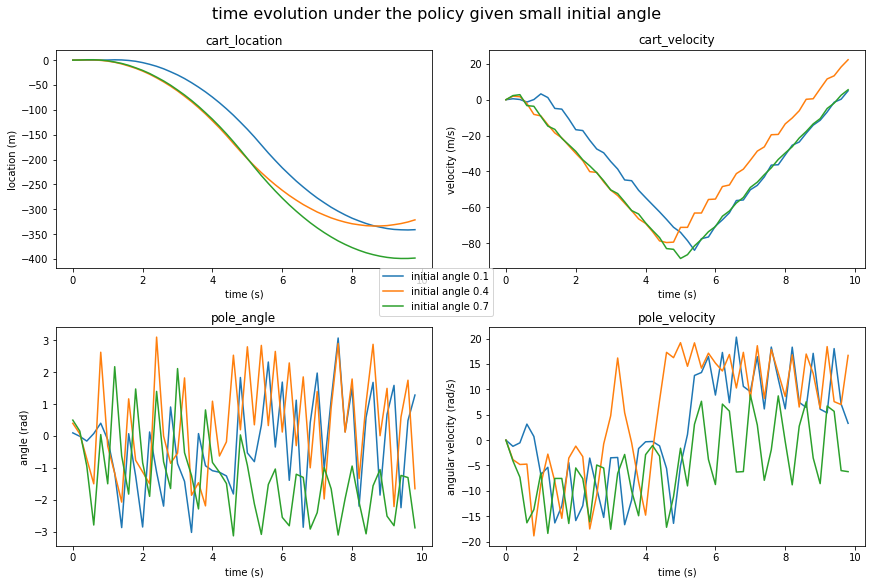

In [266]:
# array([-4.24150867,  8.99253043, 19.38815101,  5.01802993]) stabilising!
max_t = 10
X_cartpole1, _ = rolloutp(max_t,np.array([0,0,0.1,0,0]),p)
X_cartpole2, _ = rolloutp(max_t,np.array([0,0,0.4,0,0]),p)
X_cartpole3, _ = rolloutp(max_t,np.array([0,0,0.5,0,0]),p)
"""plot the time evolution using p"""
t = np.arange(0,max_t,cartpole1.delta_time)
fig, axs = plt.subplots(2,2,figsize=(12,8),constrained_layout=True)
axs[0,0].plot(t,X_cartpole1[:,0],label='initial angle 0.1')
axs[0,0].plot(t,X_cartpole2[:,0],label='initial angle 0.4')
axs[0,0].plot(t,X_cartpole3[:,0],label='initial angle 0.5')
axs[0,0].set_title('cart_location')
axs[0,0].set_xlabel('time (s)')
axs[0,0].set_ylabel('location (m)')
axs[0,0].autoscale()

axs[0,1].plot(t,X_cartpole1[:,1],label='initial angle 0.1')
axs[0,1].plot(t,X_cartpole2[:,1],label='initial angle 0.4')
axs[0,1].plot(t,X_cartpole3[:,1],label='initial angle 0.5')
axs[0,1].set_title('cart_velocity')
axs[0,1].set_xlabel('time (s)')
axs[0,1].set_ylabel('velocity (m/s)')
axs[0,1].autoscale()

axs[1,0].plot(t,X_cartpole1[:,2],label='inital angle 0.1')
axs[1,0].plot(t,X_cartpole2[:,2],label='inital angle 0.4')
axs[1,0].plot(t,X_cartpole3[:,2],label='inital angle 0.5')
axs[1,0].set_title('pole_angle')
axs[1,0].set_xlabel('time (s)')
axs[1,0].set_ylabel('angle (rad)')
axs[1,0].autoscale()

axs[1,1].plot(t,X_cartpole1[:,3],label='initial angle 0.1')
axs[1,1].plot(t,X_cartpole2[:,3],label='initial angle 0.4')
axs[1,1].plot(t,X_cartpole3[:,3],label='initial angle 0.5')
axs[1,1].set_title('pole_velocity')
axs[1,1].set_xlabel('time (s)')
axs[1,1].set_ylabel('angular velocity (rad/s)')
axs[1,1].autoscale()

handles, labels = axs[1,1].get_legend_handles_labels()
fig.legend(handles, labels, loc='center')
fig.suptitle('time evolution under the policy given small initial angle', fontsize=16)

plt.show()

In [281]:
p = np.array([-4,10,20,5])
res = minimize(modelL,p,method='Nelder-Mead')
p = res.x

In [279]:
p

array([-5.96309594e+00,  1.70072895e-03,  8.58605718e-01,  1.09425442e+01])

In [267]:
# p = np.array([0.77,1.59,20.12,2.59])

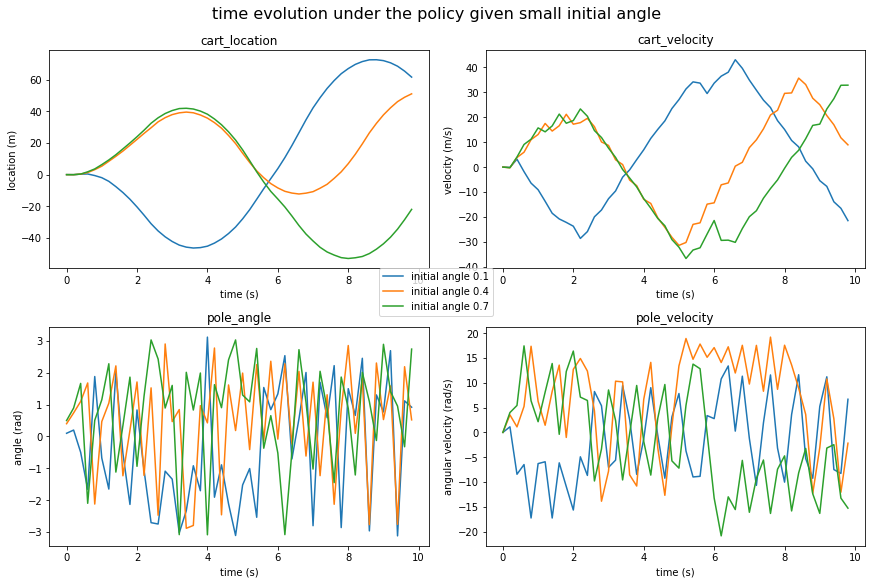

In [280]:
max_t = 10
X_cartpole1, _ = rolloutp(max_t,np.array([0,0,0.1,0,0]),p)
X_cartpole2, _ = rolloutp(max_t,np.array([0,0,0.4,0,0]),p)
X_cartpole3, _ = rolloutp(max_t,np.array([0,0,0.5,0,0]),p)
"""plot the time evolution using p"""
t = np.arange(0,max_t,cartpole1.delta_time)
fig, axs = plt.subplots(2,2,figsize=(12,8),constrained_layout=True)
axs[0,0].plot(t,X_cartpole1[:,0],label='initial angle 0.1')
axs[0,0].plot(t,X_cartpole2[:,0],label='initial angle 0.4')
axs[0,0].plot(t,X_cartpole3[:,0],label='initial angle 0.7')
axs[0,0].set_title('cart_location')
axs[0,0].set_xlabel('time (s)')
axs[0,0].set_ylabel('location (m)')
axs[0,0].autoscale()

axs[0,1].plot(t,X_cartpole1[:,1],label='initial angle 0.1')
axs[0,1].plot(t,X_cartpole2[:,1],label='initial angle 0.4')
axs[0,1].plot(t,X_cartpole3[:,1],label='initial angle 0.7')
axs[0,1].set_title('cart_velocity')
axs[0,1].set_xlabel('time (s)')
axs[0,1].set_ylabel('velocity (m/s)')
axs[0,1].autoscale()

axs[1,0].plot(t,X_cartpole1[:,2],label='inital angle 0.1')
axs[1,0].plot(t,X_cartpole2[:,2],label='inital angle 0.4')
axs[1,0].plot(t,X_cartpole3[:,2],label='inital angle 0.7')
axs[1,0].set_title('pole_angle')
axs[1,0].set_xlabel('time (s)')
axs[1,0].set_ylabel('angle (rad)')
axs[1,0].autoscale()

axs[1,1].plot(t,X_cartpole1[:,3],label='initial angle 0.1')
axs[1,1].plot(t,X_cartpole2[:,3],label='initial angle 0.4')
axs[1,1].plot(t,X_cartpole3[:,3],label='initial angle 0.7')
axs[1,1].set_title('pole_velocity')
axs[1,1].set_xlabel('time (s)')
axs[1,1].set_ylabel('angular velocity (rad/s)')
axs[1,1].autoscale()

handles, labels = axs[1,1].get_legend_handles_labels()
fig.legend(handles, labels, loc='center')
fig.suptitle('time evolution under the policy given small initial angle', fontsize=16)

plt.show()